In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.2)

In [3]:
df = pd.read_csv("117 01Students.csv")
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


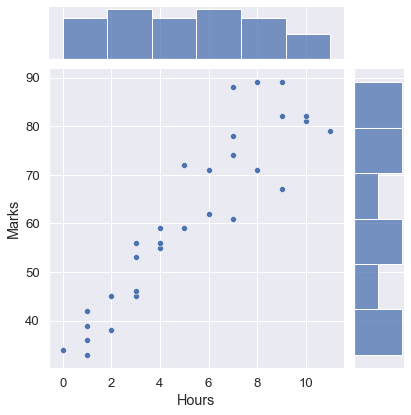

In [6]:
sns.jointplot(data=df,y='Marks',x='Hours')

In [16]:
x = df['Hours'].values.reshape(-1,1)
y = df['Marks']

In [17]:
x

array([[ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 6],
       [ 6],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [ 9],
       [10],
       [10],
       [11]], dtype=int64)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [19]:
x_train.shape

(21, 1)

In [20]:
x_test.shape

(9, 1)

In [21]:
y_train.shape

(21,)

In [22]:
y_test.shape

(9,)

In [23]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)
y_pred

array([85.04609767, 59.95823825, 75.0109539 , 64.97581013, 49.92309448,
       49.92309448, 85.04609767, 80.02852579, 54.94066636])

In [25]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

In [26]:
model.score(x_train,y_train)

0.8111744903394346

In [27]:
model.score(x_test,y_test)

0.8538655334937385

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test,y_pred)

31.92226235014556

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.649978969000288

In [31]:
model.predict([[12]])

array([95.08124144])

In [32]:
model.predict([[9.5]])

array([82.53731173])

In [33]:
model.predict([[2.5]])

array([47.41430853])

In [34]:
model.coef_

array([5.01757188])

In [35]:
model.intercept_

34.87037882245551

**h(x) = 34.87 + 5 * x**

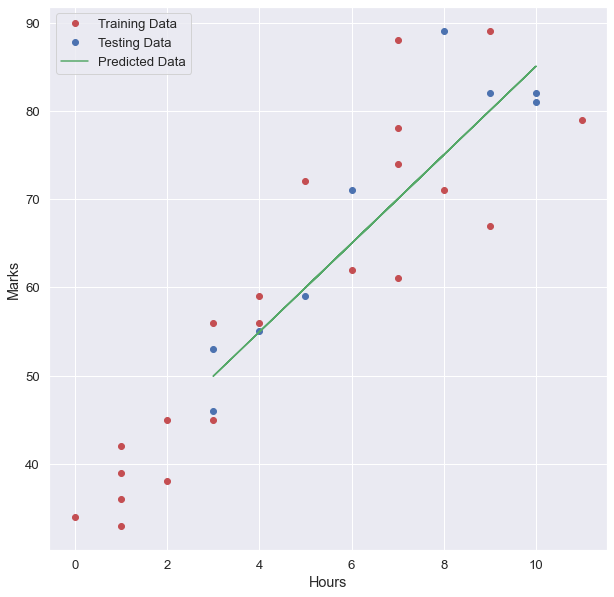

In [36]:
plt.plot(x_train,y_train,'ro',label='Training Data')
plt.plot(x_test,y_test,'bo',label='Testing Data')
plt.plot(x_test,y_pred,'g-',label='Predicted Data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()

In [38]:
x1 = df['Hours']
y = df['Marks']

In [40]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Marks   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 19 Jan 2021   Prob (F-statistic):           1.77e-12
Time:                        23:42:08   Log-Likelihood:                -101.28
No. Observations:                  30   AIC:                             206.6
Df Residuals:                      28   BIC:                             209.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.9661      2.591     13.495      0.000      29.659      40.274
Hours          5.0834      0.427     11.912      0.000       4.209       5.958
==============================================================================
Omnibus:                        1.311   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.519   Jarque-Bera (JB):                0.816
Skew:                           0.404   Prob(JB):                        0.665
Kurtosis:                       2.981   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""